In [55]:
#read train data
import pandas as pd
original_train_data = pd.read_csv('../original_data/train_X.csv')
original_train_label = pd.read_csv('../original_data/train_y.csv')


In [56]:
import pandas as pd
from scipy.interpolate import interp1d
# find the columns which are numeric
numeric_columns = original_train_data.select_dtypes(include='number').columns

# interpolate the missing values
for column in numeric_columns:

    original_train_data[column] = original_train_data[column].interpolate(method='linear', limit_direction='both')

for column in original_train_data.columns:

    if original_train_data[column].isnull().any():

        value_counts = original_train_data[column].value_counts()

        most_frequent_value = value_counts.idxmax()

        original_train_data[column] = original_train_data[column].fillna(most_frequent_value)
        
# print(original_train_data.head())
print("Work done!")


Work done!


In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#use one-hot encoding for categorical features
original_train_data = pd.get_dummies(original_train_data)
#use standardization for numeric features

numeric_columns = original_train_data.select_dtypes(include='number').columns
scaler = StandardScaler()
original_train_data[numeric_columns] = scaler.fit_transform(original_train_data[numeric_columns])

print("Work done!")


Work done!


In [58]:
#use one-hot encoding for categorical features
original_train_data = pd.get_dummies(original_train_data).astype(float)
# print(original_train_data.head())
print("Work done!")

Work done!


In [59]:
#drop the columns which is encounter_id and patient_id and hospital_id
original_train_data = original_train_data.drop(['encounter_id', 'patient_id'], axis=1)
#convert the attributes which value is true to 1 and false to 0
# print(original_train_data.head())
print("Work done!")


Work done!


In [60]:
original_train_data.to_csv("../preprocessed_data/preprocessed_train_X.csv", index=False)
print("Work done!")

Work done!


In [61]:
preprocessed_train_X = pd.read_csv('../preprocessed_data/preprocessed_train_X.csv')
train_label = pd.read_csv('../original_data/train_y.csv')
print("Work done!")

Work done!


In [63]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300,random_state=42)

model.fit(original_train_data, train_label)

feature_importances = model.feature_importances_

selected_features = original_train_data.columns[feature_importances > 0.003]  

print(selected_features)

c:\Users\Steven\anaconda3\envs\datamining\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Index(['hospital_id', 'age', 'bmi', 'height', 'icu_id', 'pre_icu_los_days',
       'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
       'heart_rate_apache', 'intubated_apache', 'map_apache',
       'resprate_apache', 'temp_apache', 'ventilated_apache', 'd1_diasbp_max',
       'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasi

In [64]:
#use the selected features to train the model
selected_train_X = original_train_data[selected_features]
selected_train_X.to_csv("../preprocessed_data/selected_train_X.csv", index=False)


age                                        0
bmi                                        0
elective_surgery                           0
height                                     0
icu_id                                     0
                                          ..
apache_2_bodysystem_Renal/Genitourinary    0
apache_2_bodysystem_Respiratory            0
apache_2_bodysystem_Trauma                 0
apache_2_bodysystem_Undefined Diagnoses    0
apache_2_bodysystem_Undefined diagnoses    0
Length: 118, dtype: int64


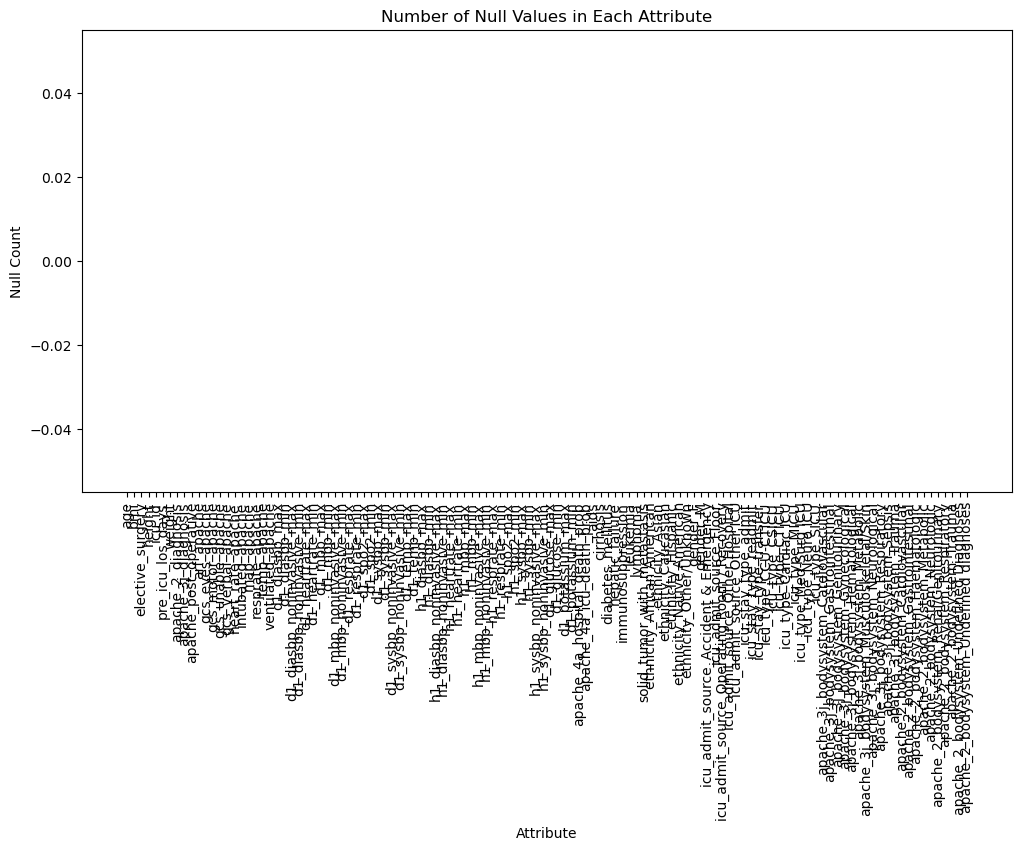

In [96]:
#count the row number that has null value
null_counts_per_row = original_train_data.isnull().sum(axis=0)
print(null_counts_per_row)
#draw the histogram of each row's count that has null value
ull_counts_df = pd.DataFrame({'Attribute': null_counts_per_row.index, 'NullCount': null_counts_per_row.values})
import matplotlib.pyplot as plt
null_counts_df = pd.DataFrame({'Attribute': null_counts_per_row.index, 'NullCount': null_counts_per_row.values})
plt.figure(figsize=(12, 6))
plt.bar(null_counts_df['Attribute'], null_counts_df['NullCount'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Number of Null Values in Each Attribute')
plt.xlabel('Attribute')
plt.ylabel('Null Count')
plt.show()